In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([0, 1, 2, 3, 4, 5])
print(x)

[0 1 2 3 4 5]


In [3]:
y = x**2
y2 = 2*x+1

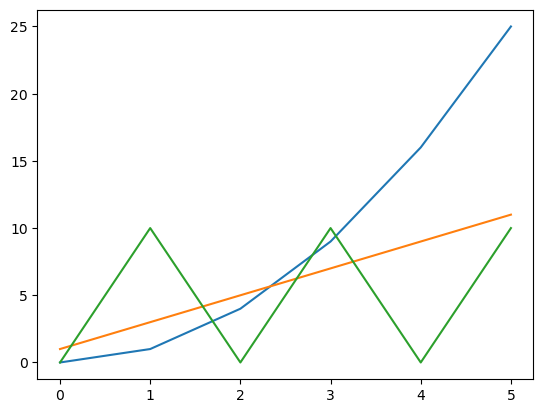

In [4]:
plt.plot(x,y)
plt.plot(x, y2)
y3 = 10*(x%2)
plt.plot(x, y3)

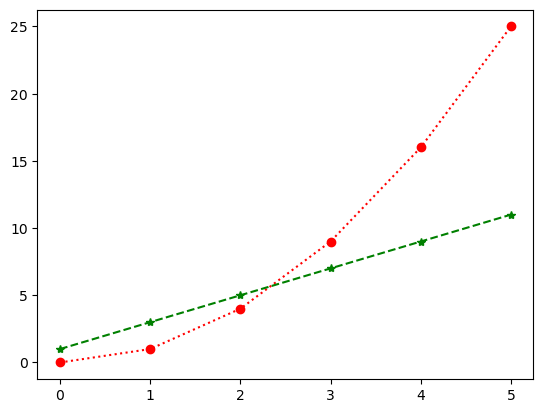

In [5]:
plt.plot(x, y, 'o:r')
plt.plot(x, y2, '*--g')

In [6]:
# Import the requests library for making http requests
import requests as r
# Create a header that says the request is coming form a browser-like agent (this is to prevent the website blocking our request)
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
}


In [9]:
base_url = 'https://api.weather.gov/'
lat, long = 39.89, -105
points_url = base_url+f"points/{lat},{long}"

In [10]:
print(points_url)

https://api.weather.gov/points/39.89,-105


In [11]:
response = r.get(points_url, headers=headers)

In [13]:
response.status_code

200

In [18]:
j_data = response.json()
print(j_data.keys())

dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])


In [19]:
for key in j_data.keys():
    print(j_data[key])

['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 's': 'https://schema.org/', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#', 'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'}, 'city': 's:addressLocality', 'state': 's:addressRegion', 'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'}, 'bearing': {'@type': 's:QuantitativeValue'}, 'value': {'@id': 's:value'}, 'unitCode': {'@id': 's:unitCode', '@type': '@id'}, 'forecastOffice': {'@type': '@id'}, 'forecastGridData': {'@type': '@id'}, 'publicZone': {'@type': '@id'}, 'county': {'@type': '@id'}}]
https://api.weather.gov/points/39.89,-105
Feature
{'type': 'Point', 'coordinates': [-105, 39.89]}
{'@id': 'https://api.weather.gov/points/39.89,-105', '@type': 'wx:Point', 'cwa': 'BOU', 'forecastOffice': 'https://api.weather.gov/offices/BOU', 'gridId': 'BOU',

In [22]:
print(j_data['properties'])

{'@id': 'https://api.weather.gov/points/39.89,-105', '@type': 'wx:Point', 'cwa': 'BOU', 'forecastOffice': 'https://api.weather.gov/offices/BOU', 'gridId': 'BOU', 'gridX': 63, 'gridY': 68, 'forecast': 'https://api.weather.gov/gridpoints/BOU/63,68/forecast', 'forecastHourly': 'https://api.weather.gov/gridpoints/BOU/63,68/forecast/hourly', 'forecastGridData': 'https://api.weather.gov/gridpoints/BOU/63,68', 'observationStations': 'https://api.weather.gov/gridpoints/BOU/63,68/stations', 'relativeLocation': {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-104.97884, 39.911166]}, 'properties': {'city': 'Northglenn', 'state': 'CO', 'distance': {'unitCode': 'wmoUnit:m', 'value': 2966.0385944932}, 'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 217}}}, 'forecastZone': 'https://api.weather.gov/zones/forecast/COZ040', 'county': 'https://api.weather.gov/zones/county/COC001', 'fireWeatherZone': 'https://api.weather.gov/zones/fire/COZ240', 'timeZone': 'America/Denver', 'r

In [23]:
print(j_data['properties']['forecastHourly'])

https://api.weather.gov/gridpoints/BOU/63,68/forecast


In [31]:
forecast_request = r.get(j_data['properties']['forecast'], headers=headers)

In [32]:
forecast_request.status_code

200

In [33]:
forecast = forecast_request.json()

In [35]:
print(forecast['properties'])

{'units': 'us', 'forecastGenerator': 'BaselineForecastGenerator', 'generatedAt': '2025-12-22T21:18:20+00:00', 'updateTime': '2025-12-22T21:06:32+00:00', 'validTimes': '2025-12-22T15:00:00+00:00/P7DT13H', 'elevation': {'unitCode': 'wmoUnit:m', 'value': 1676.0952}, 'periods': [{'number': 1, 'name': 'This Afternoon', 'startTime': '2025-12-22T14:00:00-07:00', 'endTime': '2025-12-22T18:00:00-07:00', 'isDaytime': True, 'temperature': 75, 'temperatureUnit': 'F', 'temperatureTrend': None, 'probabilityOfPrecipitation': {'unitCode': 'wmoUnit:percent', 'value': 0}, 'windSpeed': '9 mph', 'windDirection': 'W', 'icon': 'https://api.weather.gov/icons/land/day/sct?size=medium', 'shortForecast': 'Mostly Sunny', 'detailedForecast': 'Mostly sunny. High near 75, with temperatures falling to around 68 in the afternoon. West wind around 9 mph, with gusts as high as 24 mph.'}, {'number': 2, 'name': 'Tonight', 'startTime': '2025-12-22T18:00:00-07:00', 'endTime': '2025-12-23T06:00:00-07:00', 'isDaytime': False

In [36]:
hourly = forecast['properties']['periods']

In [37]:
len(hourly)

14

In [38]:
type(hourly)

list

In [49]:
x = []
y = []
for hour in hourly:
    print(
    print(f"Hour {hour['number']} temperature(degrees F):{hour['temperature']}")
    x.append(hour['number'])
    y.append(hour['temperature'])


Hour 1 temperature(degrees F):75
Hour 2 temperature(degrees F):41
Hour 3 temperature(degrees F):64
Hour 4 temperature(degrees F):41
Hour 5 temperature(degrees F):65
Hour 6 temperature(degrees F):42
Hour 7 temperature(degrees F):68
Hour 8 temperature(degrees F):40
Hour 9 temperature(degrees F):62
Hour 10 temperature(degrees F):34
Hour 11 temperature(degrees F):50
Hour 12 temperature(degrees F):26
Hour 13 temperature(degrees F):44
Hour 14 temperature(degrees F):29


In [50]:
print(x, y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] [75, 41, 64, 41, 65, 42, 68, 40, 62, 34, 50, 26, 44, 29]


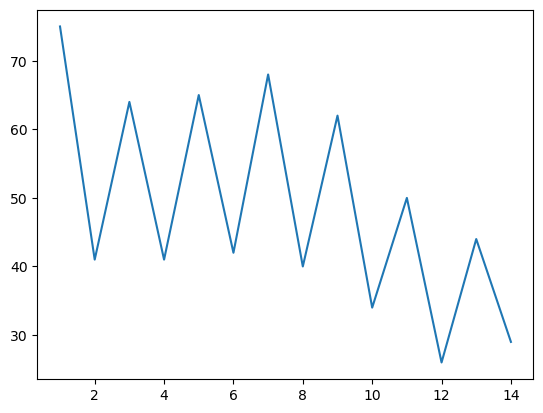

In [52]:
plt.plot(x, y)
